#### Analisis de un amplificador clase B exitado con AM.

El siguiente circuito corresponde a un amplificador Clase B. 

Este amplificador ultiliza un transistor MOSFET, cuya  transferencia se define con la función:


$ I_D =  9.6*log_{10}(1+V_{GS})$


Se estudiara la respuesta del amplificador exitado con una modulación AM. 





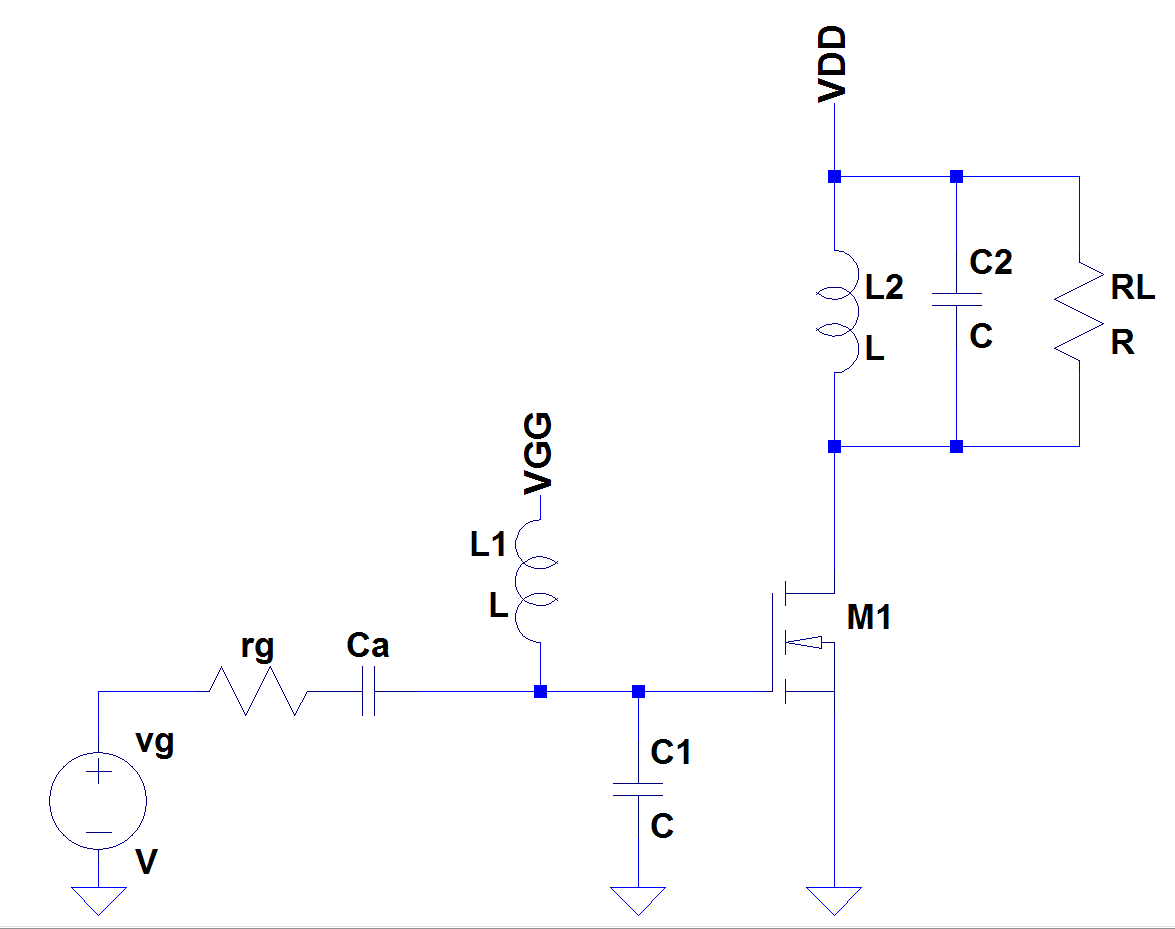

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  

params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

Image(filename= "/home/aalmela/Dropbox/EAIII/04- Ejercitacion/clase c/figures/ejercicio_1lt.png",width=550)

In [3]:
#parametros de la senal AM
amp = 5.5    #amplitud de la portadora
fc = 1e4     #frecuencia de la portadora
m = 0.8      #indice de modulacion
fm = 1e3     #frecuencia de la modulante

#tiempo de un periodo de la modulante
Tm  = 1/fm
#delta time para el calculo de los armonicos
dt  = 1/(fc*10)

#parametros del filtro de salida
fo = fc
BW = 2*fm*5
Qc = fo/BW

#parametros del transistor
Vgs_min = 10 
Vgs_max = 200

Respesta del transistor

Esta funcion representa la respuesta del transistor

In [25]:
def idi(v):
    i = 2.5 * v + 0.01*(v)**3 if v > 0 else 0 
    return i

Plot de la respesta

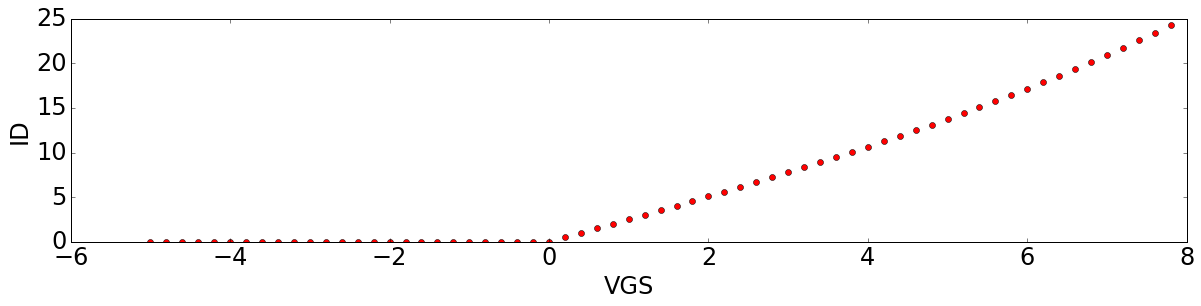

In [28]:
vgs = np.arange(-5.,8.,0.2)
vgs
ids = []
for v in vgs:
    v
    ids.append(idi(v))
#%matplotlib inline
#plt.gca().cla()
plt.plot(vgs,ids,'ro')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.rcParams['figure.figsize'] = (20.0, 4.0)
plt.show()

Se define la funcion de la tension de entrada vgs como una senal AM

In [6]:
def vam(amp,m,th_m,th_c):
    return amp*(1+m*cos(th_m))*cos(th_c)

Plot de la senal AM

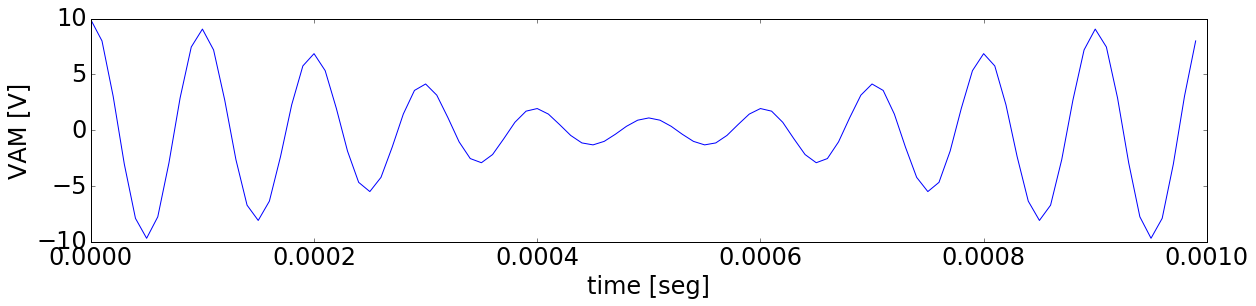

In [7]:
time = np.arange(0,Tm,dt)
vgs = []
for t in time:
    vgs.append(vam(amp, m , 2*np.pi*fm*t,2*np.pi*fc*t))

plt.plot(time,vgs)
plt.xlabel('time [seg]')
plt.ylabel('VAM [V]')
plt.show()

Analisis de Fourier para la senal AM de entrada

In [8]:
vin_f = []
maxArmon = int(1.5 * fc/fm)
armonicos = np.arange(0,fm*maxArmon,fm)
for a,f in enumerate(armonicos): 
    if a == 0 : 
        vin_o = 0.0
        for x,t in enumerate(time):
            vin_o = vin_o + vgs[x]*dt/Tm
        vin_f.append(vin_o)
    else : 
        vin_a = 0.0
        for x,t in enumerate(time):
            vin_a = vin_a + vgs[x]*dt*np.cos(2*np.pi*fm*t*a)*2/Tm
        vin_f.append(vin_a)
       


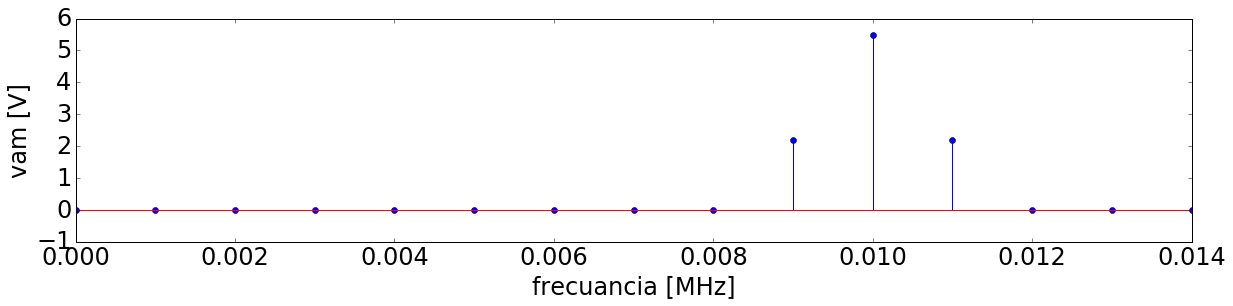

In [9]:
plt.stem(armonicos[:]/1e6,vin_f[:]) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('vam [V]')


Corriente de salida del transistor 

En un clase B todos los pulsos de corriente tiene un angulo de circulacion 

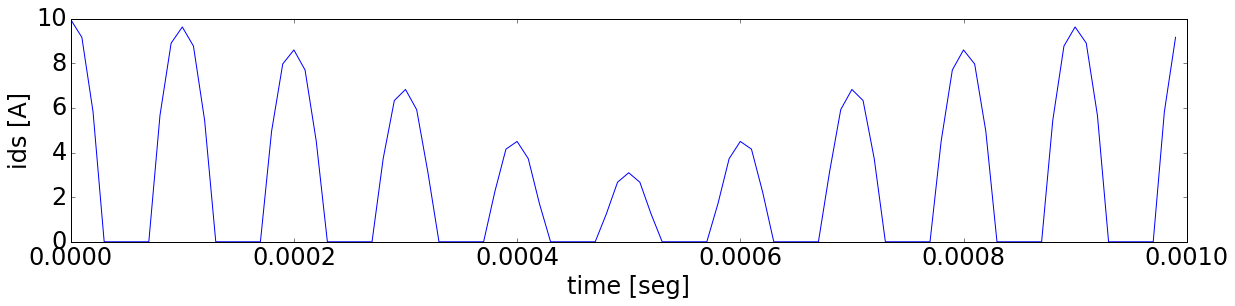

In [10]:
ids = []
for x,t in enumerate(time):
    ids.append(idi(vgs[x]))

plt.plot(time,ids)
plt.xlabel('time [seg]')
plt.ylabel('ids [A]')

Analisis de Fourier para la corriente de salida

In [11]:
iout_f = []

for a,f in enumerate(armonicos): 
    if a == 0 : 
        iout_o = 0.0
        for x,t in enumerate(time):
            iout_o = iout_o + idi(vgs[x])*dt/Tm
        iout_f.append(iout_o)
    else : 
        iout_a = 0.0
        for x,t in enumerate(time):
            iout_a = iout_a + idi(vgs[x])*dt*np.cos(2*np.pi*fm*t*a)*2/Tm
        iout_f.append(iout_a)



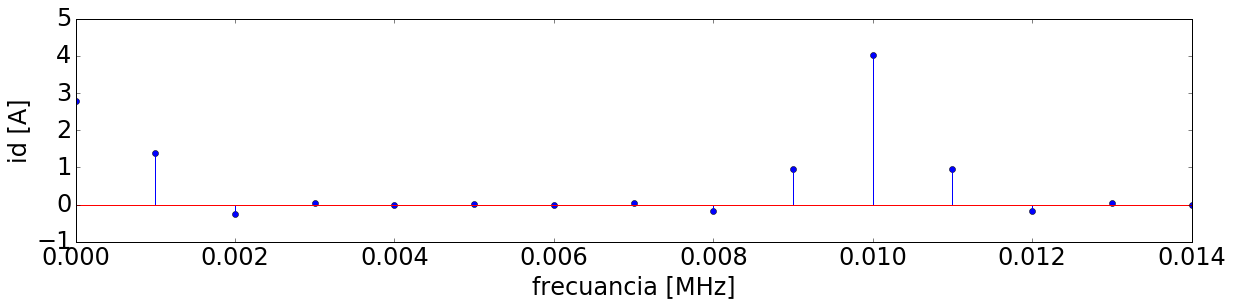

In [12]:

plt.stem(armonicos[:]/1e6,iout_f[:]) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('id [A]')

Analisis de la senal de salida
Calculo de primer armonico y continua de la portadora cada 360/n grados de la modulante

In [13]:
n    = 24
th_c = np.arange(0,2*np.pi,2*np.pi/n)
th_m = np.arange(0,2*np.pi,2*np.pi/n)

In [14]:
ids = {} # corriente de salida
idf = {} # auxiliar para el calculo de primer armonico
ido = [] # componente continua de portadora para distintos valores de la modulante
id1 = [] # componente primer armonico de la portadora para distintos valores de la modulante  


for t_m in th_m: # cada 360/n grados de la modulante
    if t_m not in ids : ids[t_m] = []
    if t_m not in idf : idf[t_m] = []
    for t_c in th_c: # calculo DC y primer armonico de la portadora
        vgs = vam(amp,m,t_m,t_c)
        ids[t_m].append(idi(vgs))
        idf[t_m].append(idi(vgs)*cos(t_c))
    ido.append(1/n * sum(ids[t_m])) 
    id1.append(2/n * sum(idf[t_m]))
           

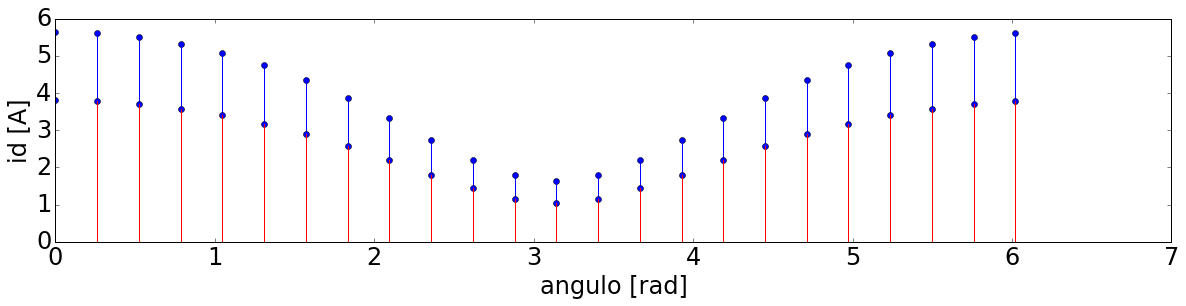

In [15]:
plt.stem(th_m,id1)
plt.stem(th_m,ido,'r')
plt.xlabel('angulo [rad]')
plt.ylabel('id [A]')
#print(id1)

Eliminando el nivel de continua 

In [16]:
id1_o = 1/n * sum(id1)
id1s  = list(id1)
for x,t in enumerate(th_m):
    id1s[x] = id1s[x] - id1_o 
    
print(id1_o)    

4.01085385748


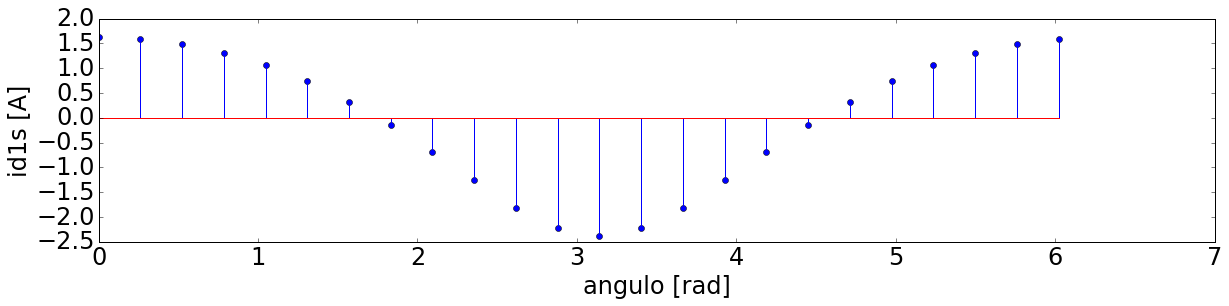

In [17]:
plt.stem(th_m,id1s) 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

Para el calculo de la distorsion, Dist = 2 Veff/(v_1)^2 - 1 

In [18]:
ieff = 0.0
for x,t_m in enumerate(th_m) :
    ieff = ieff + id1s[x]**2
ieff = ieff / n
print('De la envolvente ieff=',ieff)

De la envolvente ieff= 1.89571956187


In [19]:
id1s_f = []

for x, t_m in enumerate(th_m): # cada 360/n grados de la modulante
    id1s_f.append(id1s[x]*cos(t_m))
id1s_1 = (2/n * sum(id1s_f))

print('De la envolvente id1=',id1s_1)


De la envolvente id1= 1.91326741505


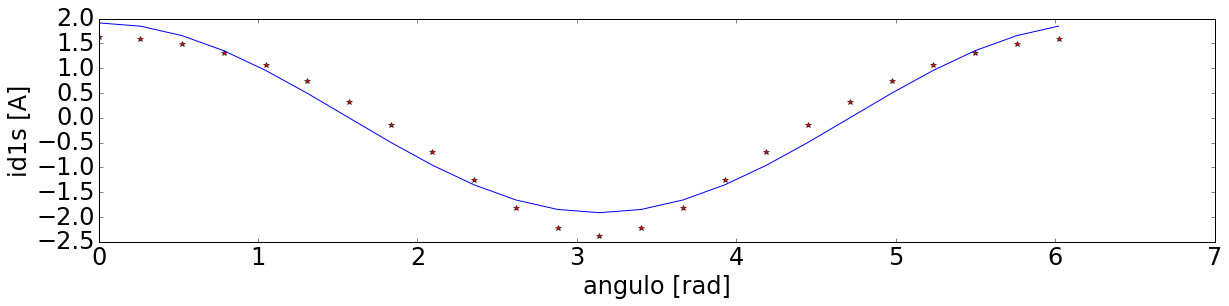

In [20]:
id1st = []
for t_m in th_m:
    id1st.append(id1s_1*cos(t_m))
    
plt.plot(th_m,id1s,'r*', th_m,id1st, 'b-') 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

In [21]:
dist = (2*ieff/id1s_1**2 - 1) * 100

print('distorsion=',  dist ,'%')

distorsion= 3.57447415785 %


In [22]:
#Portadora
idco = ido[int(n/4)] 
idc1 = id1[int(n/4)]

#Poradora en condicion de Pico
idcpo = ido[0] 
idcp1 = id1[0]

#Poradora en condicion de valle
idcvo = ido[int(n/8)] 
idcv1 = id1[int(n/8)]

print('Portadora                                                =>  idco=',idco,'A ,  idc1=',idc1,'A' )
print('Portadora en pico de modulante (solo el primer arminico) => idcpo=',idcpo,'A , idcp1=',idcp1,'A')
print('Portadora en valle de modulante (solo el primer arminico)=> idcvo=',idcvo,'A , idcv1=',idcv1,'A')



Portadora                                                =>  idco= 2.89202118812 A ,  idc1= 4.33923649159 A
Portadora en pico de modulante (solo el primer arminico) => idcpo= 3.80233781599 A , idcp1= 5.64142809084 A
Portadora en valle de modulante (solo el primer arminico)=> idcvo= 3.57785245995 A , idcv1= 5.32203365833 A


In [23]:
#calculo de la resistencia de carga de salida teniendo la portadora en pico para el primer armonico de la modulante
Vp  = (Vgs_max-Vgs_min)/ 2
VDD = Vp + Vgs_min
print('VDD=', VDD, 'V')
print('Vp=' , Vp, 'V')

RL = Vp / i_cp
print('RL=', RL, 'ohms')
 

VDD= 105.0 V
Vp= 95.0 V


NameError: name 'i_cp' is not defined

Calculo de las potencias

In [24]:
#Portadora
PDC_c = idco * VDD
PRL_c = idc1 * Vp / 2
PTR_c = PDC_c - PRL_c

#Portadora en pico 
PDC_cp = idcpo * VDD
PRL_cp = idcp1 * Vp / 2
PTR_cp = PDC_cp - PRL_cp

#Portadora en valle 
PDC_cv = idcvo * VDD
PRL_cv = idcv1 * Vp / 2
PTR_cv = PDC_cv - PRL_cv


print('Potencia de portadora            => PDC =', PDC_c, 'W, PRL=', PRL_c, 'W, PTR=',  PTR_c, 'W.')
print('Potencia de portadora en pico    => PDC =', PDC_cp,'W, PRL=', PRL_cp,'W, PTR=',  PTR_cp, 'W.')
print('Potencia de portadora en valle   => PDC =', PDC_cv,'W, PRL=', PRL_cv,'W, PTR=',  PTR_cv, 'W.')

Potencia de portadora            => PDC = 303.662224753 W, PRL= 206.11373335 W, PTR= 97.5484914022 W.
Potencia de portadora en pico    => PDC = 399.245470679 W, PRL= 267.967834315 W, PTR= 131.277636364 W.
Potencia de portadora en valle   => PDC = 375.674508295 W, PRL= 252.79659877 W, PTR= 122.877909524 W.


Estos pulsos de corriente son filtrados por un simple sintonizado 

In [572]:
def SS(vin,f, Qc, fo):
    return vin*abs(1/(1+(Qc*(f/fo-fo/f))**2)**0.5)

In [573]:
#calculo de la transferencia del filtro
vout_f = []
for x,i in enumerate(iout_f):
    vout_f.append(SS(i*RL,armonicos[x],Qc,fo))

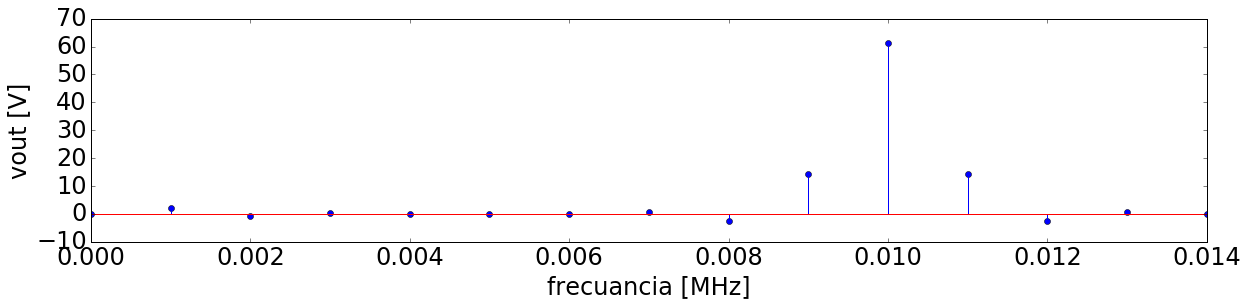

In [574]:
plt.stem(armonicos[:]/1e6,vout_f[:]) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('vout [V]')